Attrition: Whether employees are still with the company or whether they’ve gone to work somewhere else.

Age: 18 to 60 years old

Gender: Female or Male

Department: Research & Development, Sales, Human Resources.

BusinessTravel: Travel_Rarely, Travel_Frequently, Non-Travel.

DistanceFromHome: Distance between the company and their home in miles.

MonthlyIncome: Employees' numeric monthly income.

MaritalStatus: Married, Single, Divorced.

Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'.

EducationField: Life Sciences， Medical， Marketing，Technical Degree，Other.

EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.

RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.

JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.

JobRole: Sales Executive，Research Science, Laboratory Tec, Manufacturing, Healthcare Rep, etc

JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.

OverTime: Whether they work overtime or not.

NumCompaniesWorked: Number of companies they worked for before joinging IBM.

PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'.

YearsAtCompany: Years they worked for IBM.

WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'.

YearsSinceLastPromotion: Years passed since their last promotion.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [41]:
hrdata=pd.read_csv('HR_attrition.csv')
hrdata.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33.0,Yes,Travel_Frequently,NaN,3.0,Life Sciences,1,Male,3,1,Research Scientist,1.0,3348.0,1,Yes,11,3,10
1,NaN,Yes,Travel_Rarely,Sales,4.0,Medical,4,Male,1,3,Sales Executive,4.0,NaN,1,No,11,3,14


In [42]:
#1. Missing Value Treatment
hrdata.isnull().sum()/len(hrdata)*100

Age                         9.493671
Attrition                   0.000000
BusinessTravel              6.329114
Department                 11.075949
DistanceFromHome           11.392405
EducationField              0.000000
EnvironmentSatisfaction     0.000000
Gender                      0.000000
JobInvolvement              0.000000
JobLevel                    0.000000
JobRole                     0.000000
JobSatisfaction             2.531646
MonthlyIncome               7.594937
NumCompaniesWorked          0.000000
OverTime                    0.000000
PercentSalaryHike           0.000000
PerformanceRating           0.000000
YearsAtCompany              0.000000
dtype: float64

In [ ]:
# its common to see age and job level are inter related

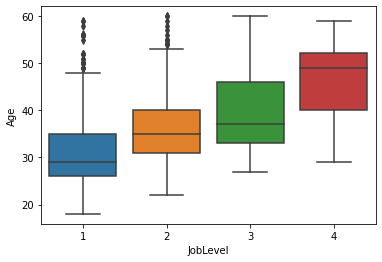

In [43]:
sb.boxplot(x=hrdata['JobLevel'],y=hrdata['Age'])

In [ ]:
# we fill missing values using age as group

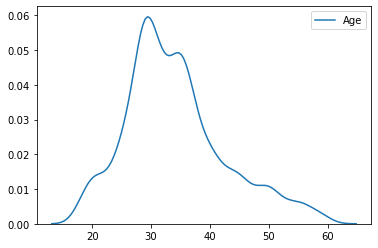

In [112]:
sb.kdeplot(hrdata['Age'])

In [113]:
hrdata['Age'].skew()

0.7123476825540647

In [ ]:
# right skewed so we go for median

In [44]:
hrdata['Age']=hrdata['Age'].fillna(hrdata.groupby('JobLevel')['Age'].transform('median'))

In [ ]:
# to fill the missing values of monthly income we can group the mothly income ny job level as very evident relationship

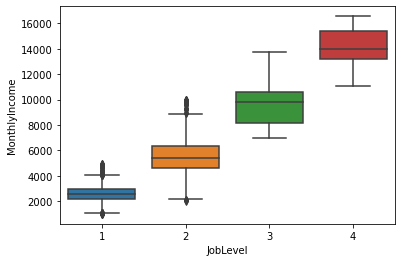

In [45]:
sb.boxplot(x=hrdata['JobLevel'],y=hrdata['MonthlyIncome'])

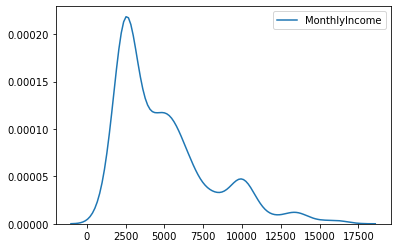

In [114]:
sb.kdeplot(hrdata['MonthlyIncome'])

In [115]:
hrdata['MonthlyIncome'].skew()

1.2368476453213177

In [46]:
hrdata['MonthlyIncome']=hrdata['MonthlyIncome'].fillna(hrdata.groupby('JobLevel')['MonthlyIncome'].transform('median'))

In [116]:
hrdata['BusinessTravel'].value_counts()

Travel_Rarely        1146
Travel_Frequently     313
Non-Travel            121
Name: BusinessTravel, dtype: int64

In [ ]:
#categorical variable , to fill missing values using mode assuming a common relapcement

In [47]:
hrdata['BusinessTravel']=hrdata['BusinessTravel'].fillna(hrdata['BusinessTravel'].mode()[0])

In [ ]:
#seeing if there is any relationship between department and monthly income

In [48]:
hrdata['Department'].value_counts(normalize=True)

Research & Development    0.605694
Sales                     0.350178
Human Resources           0.044128
Name: Department, dtype: float64

In [49]:
hrdata.groupby(['Department'])['MonthlyIncome'].median()

Department
Human Resources           2741.0
Research & Development    3408.0
Sales                     5422.0
Name: MonthlyIncome, dtype: float64

In [ ]:
#filling missing values of department with reation to monthly income

In [50]:
ind=hrdata[hrdata['Department'].isnull()].index
for i in ind:
    if (hrdata.loc[i,'MonthlyIncome'] <2900):
        hrdata.loc[i,'Department']='Human Resources'
    elif (hrdata.loc[i,'MonthlyIncome'] > 5200):
        hrdata.loc[i,'Department']='Sales'
    else:
        hrdata.loc[i,'Department']='Research & Development'

In [ ]:
# giving very minimum value to missing values so that they do not influence the model bulidng

In [51]:
hrdata['DistanceFromHome']=hrdata['DistanceFromHome'].fillna(-999)

In [ ]:
# understanging jobstisfaction

In [52]:
hrdata['JobSatisfaction'].value_counts(normalize=True)

3.0    0.311688
4.0    0.285065
1.0    0.213636
2.0    0.189610
Name: JobSatisfaction, dtype: float64

In [ ]:
#giving a center value to missing values

In [53]:
hrdata['JobSatisfaction']=hrdata['JobSatisfaction'].fillna(hrdata['JobSatisfaction'].mode()[0])

In [54]:
hrdata.isnull().sum().sum()

0

In [55]:
num_hrdata=hrdata[['Age','DistanceFromHome',
                  'MonthlyIncome','NumCompaniesWorked',
                  'PercentSalaryHike','YearsAtCompany']]

In [56]:
# Encoding
cat_hrdata=hrdata.select_dtypes(exclude=np.number)

In [57]:
cat_hrdata['Attrition']=cat_hrdata['Attrition'].replace({'Yes':1,'No':0})

In [58]:
cat_hrdata=pd.get_dummies(cat_hrdata,columns=['OverTime'],drop_first=True)

In [59]:
cat_hrdata['JobRole'].nunique()

9

In [60]:
#MEan Encoding/Target Encoding
cat_hrdata['JobRole']=hrdata.groupby('JobRole')['MonthlyIncome'].transform('median')
#cat_hrdata['JobRole']=cat_hrdata.groupby('JobRole')['Attrition'].transform('sum')

In [61]:
#cat_hrdata.groupby('JobRole')['Attrition'].transform('sum')

In [62]:
cat_hrdata=pd.get_dummies(cat_hrdata,columns=['BusinessTravel','Department','Gender'],drop_first=True)

In [63]:
#Frequency Encoding
tab=cat_hrdata['EducationField'].value_counts(normalize=True)
cat_hrdata['EducationField']=cat_hrdata['EducationField'].map(tab)

In [64]:
final_data=pd.concat([num_hrdata,cat_hrdata],axis=1)

In [65]:
final_data=pd.concat([final_data,hrdata[['JobInvolvement',
                                        'JobLevel',
                                        'JobSatisfaction']]],axis=1)

In [66]:
final_data.head(2)

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany,Attrition,EducationField,JobRole,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Gender_Male,JobInvolvement,JobLevel,JobSatisfaction
0,33.0,3.0,3348.0,1,11,10,1,0.392405,3051.666159,1,1,0,1,0,1,3,1,1.0
1,37.0,4.0,9824.0,1,11,14,1,0.294304,7021.412371,0,0,1,0,1,1,1,3,4.0


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
inp=final_data.drop('Attrition',axis=1)
out=final_data['Attrition']
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48,
                                          stratify=out)

lm=LogisticRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72       264
           1       0.65      0.41      0.50       210

    accuracy                           0.64       474
   macro avg       0.64      0.62      0.61       474
weighted avg       0.64      0.64      0.62       474



In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold

In [70]:
clf1 = LogisticRegression(max_iter=3000)
clf2= DecisionTreeClassifier(random_state=0)
clf3=  RandomForestClassifier(random_state=0)
clf4 = KNeighborsClassifier(n_neighbors=5) 
clf5= GaussianNB()
clf6=XGBClassifier(random_state=0)

In [71]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','DT','RF','KNN','GNB','XGB']):
    score = cross_val_score(i, inp, out, cv=kf, scoring='f1')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.6545992053822404 0.038133476622515775
DT 0.8415428536907694 0.022538510654770316
RF 0.92673142473026 0.020043860085258814
KNN 0.6550575445532526 0.05647877692115645
GNB 0.6639609712912102 0.016576396020410333
[17:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

In [72]:
# Voting Classifier 
from sklearn.ensemble import VotingClassifier
estimator=[('DT',DecisionTreeClassifier()),('rf',RandomForestClassifier()),
          ('xb',XGBClassifier())]

In [73]:
vot1=VotingClassifier(estimators=estimator, voting='hard')
vot2=VotingClassifier(estimators=estimator, voting='soft')

In [74]:
score_vot1 = cross_val_score(vot1, inp, out, cv=kf, scoring='f1')
score_vot2 = cross_val_score(vot2, inp, out, cv=kf, scoring='f1')
print('vot1',np.mean(score_vot1),np.std(score_vot1)/np.mean(score_vot1))
print('vot2',np.mean(score_vot2),np.std(score_vot2)/np.mean(score_vot2))

[17:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
# we are choosing random forest classifier to proceed 

In [75]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [76]:
feat_imp=pd.DataFrame()
feat_imp['Feature']=xtrain.columns
feat_imp['Importance']=rf.feature_importances_

In [77]:
feat_imp.sort_values('Importance',ascending=False)

,Feature,Importance
2,MonthlyIncome,0.156856
0,Age,0.129876
5,YearsAtCompany,0.097708
1,DistanceFromHome,0.088378
4,PercentSalaryHike,0.074105
8,OverTime_Yes,0.066859
3,NumCompaniesWorked,0.064675
16,JobSatisfaction,0.054524
7,JobRole,0.051084
14,JobInvolvement,0.045848


In [81]:
#! pip install treeinterpreter

In [83]:
from treeinterpreter import treeinterpreter as ti

In [84]:
 xtest.iloc[50,:]

Age                                    42.000000
DistanceFromHome                        8.000000
MonthlyIncome                        6825.000000
NumCompaniesWorked                      0.000000
PercentSalaryHike                      11.000000
YearsAtCompany                          9.000000
EducationField                          0.123418
JobRole                              7021.412371
OverTime_Yes                            0.000000
BusinessTravel_Travel_Frequently        0.000000
BusinessTravel_Travel_Rarely            1.000000
Department_Research & Development       0.000000
Department_Sales                        1.000000
Gender_Male                             1.000000
JobInvolvement                          3.000000
JobLevel                                2.000000
JobSatisfaction                         2.000000
Name: 906, dtype: float64

In [93]:
# Parameter Tuning
be=[]
ve=[]
for i in [5,10,20,40,60,80,100,120,150,200,250,300,400]:
    #for j in [10,15,20,30]:
    dt=RandomForestClassifier(n_estimators=i,random_state=48)
    #scorer = make_scorer(f1_score, average = 'weighted')
    score=cross_val_score(dt,inp,out,cv=kf,scoring='f1')
    print('n_estimator:',i)
    print('Bias Error',1-np.mean(score))
    print('Variance Error',np.std(score)/np.mean(score))
    be.append(1-np.mean(score))
    ve.append(np.std(score)/np.mean(score))

n_estimator: 5
Bias Error 0.12536837900278042
Variance Error 0.01863628699208785
n_estimator: 10
Bias Error 0.09359458379816521
Variance Error 0.012862365834453321
n_estimator: 20
Bias Error 0.08334003918534338
Variance Error 0.019580107662194795
n_estimator: 40
Bias Error 0.08379143642417797
Variance Error 0.014482915509892322
n_estimator: 60
Bias Error 0.0805546507515148
Variance Error 0.010238000373202334
n_estimator: 80
Bias Error 0.07765806944851283
Variance Error 0.01713848617195797
n_estimator: 100
Bias Error 0.0695857375411787
Variance Error 0.012950266307203034
n_estimator: 120
Bias Error 0.0706775067859381
Variance Error 0.01304524779277096
n_estimator: 150
Bias Error 0.07212679632495544
Variance Error 0.014146090326913378
n_estimator: 200
Bias Error 0.07235562194737055
Variance Error 0.013187855609825425
n_estimator: 250
Bias Error 0.0735831597439025
Variance Error 0.015596686547916705
n_estimator: 300
Bias Error 0.0743576978205217
Variance Error 0.01440062299926399
n_estima

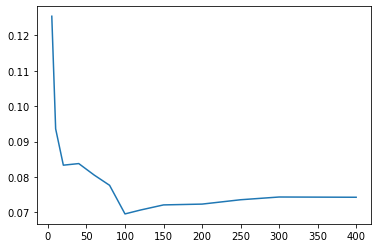

In [94]:
from matplotlib import pyplot as plt
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],be)

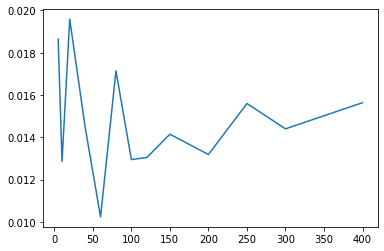

In [95]:
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],ve)

In [96]:
be1=pd.DataFrame(be)/pd.DataFrame(be).sum()
ve1=pd.DataFrame(ve)/pd.DataFrame(ve).sum()

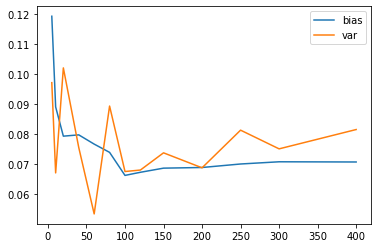

In [97]:
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],np.array(be1),label='bias')
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],np.array(ve1),label='var')
plt.legend()

In [98]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[50,80,100,120,140,190,200,210],
        #'max_features':['auto','sqrt','log2'],
        #'criterion':['gini','entropy'],
        'max_depth':[10,15,20,25,30,40]}

In [99]:
rf_mod1=RandomForestClassifier()
hyp_mod=GridSearchCV(rf_mod1,param_grid=params,scoring='f1')

In [100]:
tun_mod=hyp_mod.fit(xtrain,ytrain)

In [101]:
tun_mod.best_params_

{'max_depth': 20, 'n_estimators': 50}

In [102]:
tun_mod.best_score_

0.8994913683086425

In [104]:
final_mod=RandomForestClassifier(**tun_mod.best_params_)

In [105]:
final_mod.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=20, n_estimators=50)

In [106]:
ypred1=final_mod.predict(xtest)
ypred1_train=final_mod.predict(xtrain)

In [107]:
confusion_matrix(ytest,ypred1)

array([[248,  16],
       [ 17, 193]], dtype=int64)

In [108]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       264
           1       0.92      0.92      0.92       210

    accuracy                           0.93       474
   macro avg       0.93      0.93      0.93       474
weighted avg       0.93      0.93      0.93       474



In [109]:
score = cross_val_score(final_mod, inp, out, cv=kf, scoring='f1')
print(np.mean(score),np.std(score)/np.mean(score))

0.9267500272021781 0.01646241687915435
